In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow 
import random
import keras
import cv2 as cv
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from sklearn.manifold import TSNE
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input
from tensorflow.data import Dataset
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

In [ ]:
# load training data
test = pd.read_csv('/content/sample_data/test.csv')
# load testing data
train = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
train.shape

(990, 194)

In [ ]:
train.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [ ]:
correlation_matrix=train.corr()
correlation_matrix

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [ ]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
test.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [ ]:
test.shape

(594, 193)

In [ ]:
#check null values in train data
train.isnull().values.any() 

False

In [ ]:
#check null values in test data
test.isnull().values.any() 

False

In [ ]:
# to check if our train data is duplicated or not
train.duplicated().sum()

0

In [ ]:
# to check if our test data is duplicated or not
test.duplicated().sum()

0

<AxesSubplot:title={'center':'Correlation between Columns'}>

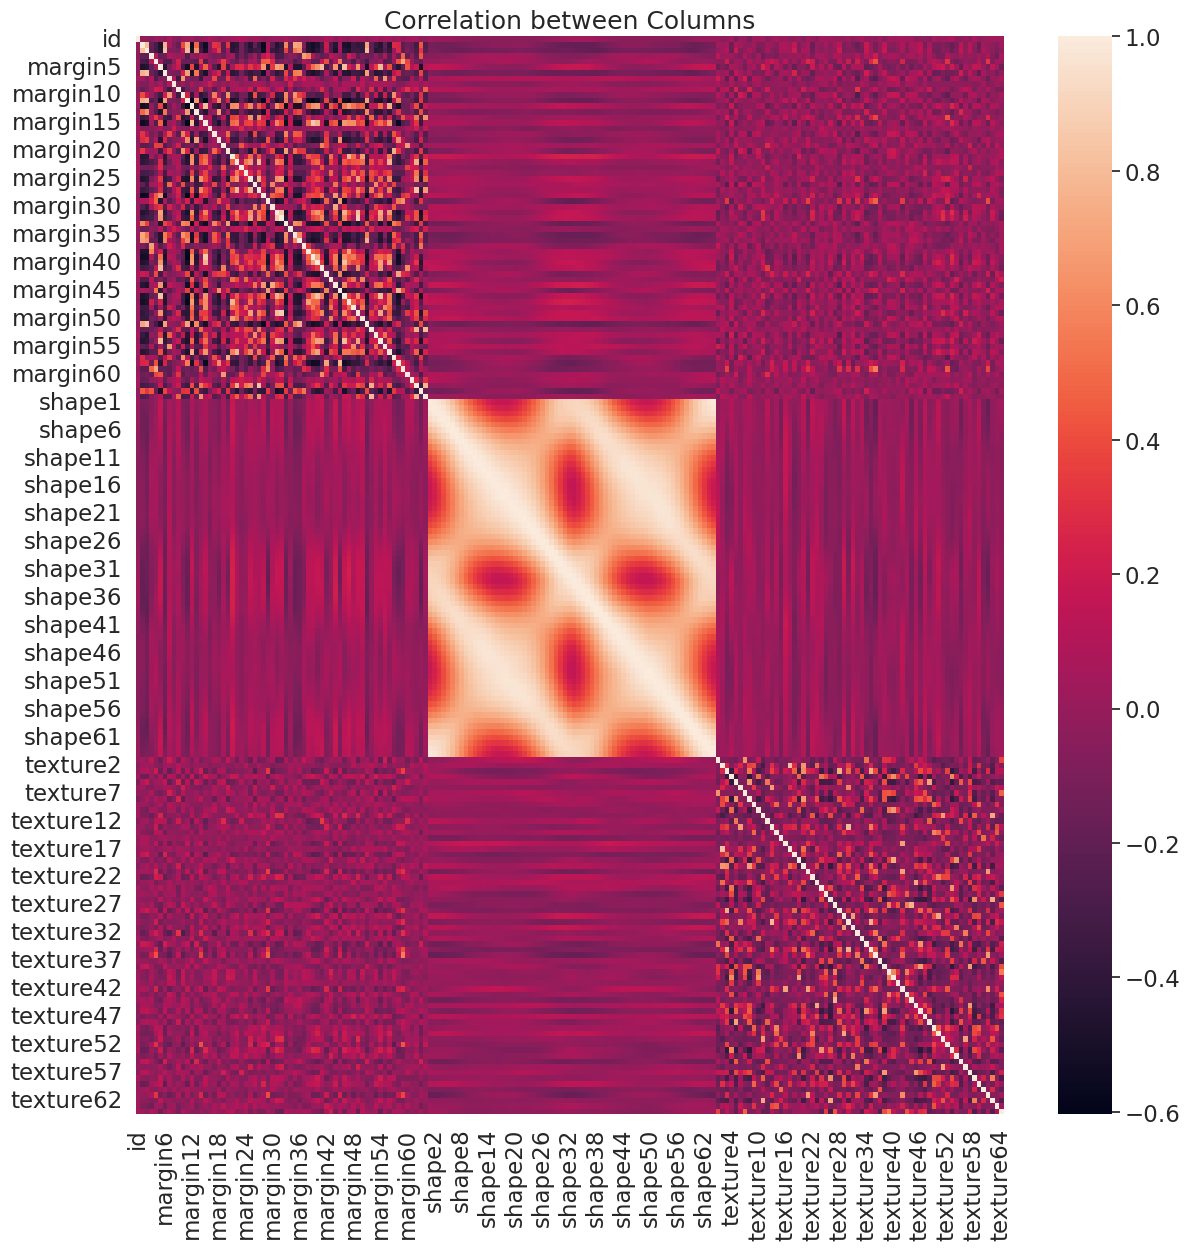

In [ ]:
# visualize the correlation between columns
plt.figure(figsize=(14,14))
plt.title('Correlation between Columns')
sns.heatmap(correlation_matrix)

In [ ]:
train["species"].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

Drawing of some Images

In [15]:
def create_image_paths(images_ids):
    images_paths = []
    img = plt.imread('/content/images/1.jpg')
    source_folder = '/content/images/'
    for id in images_ids:
        img_path = source_folder + str(id) + '.jpg'
        images_paths.append(img_path)
    return images_paths

def draw_some_images(images_paths):
    fig , axis = plt.subplots(2,4)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # load images
    images = []
    for path in images_paths:
        images.append(plt.imread(path))
    i , j = 0 , 0
    for img in images:
        axis[i,j].imshow(img,cmap='gray')
        j = j + 1
        if j == 4:
            i = i + 1
            j = 0

Drawing of some random images from the images folder every time


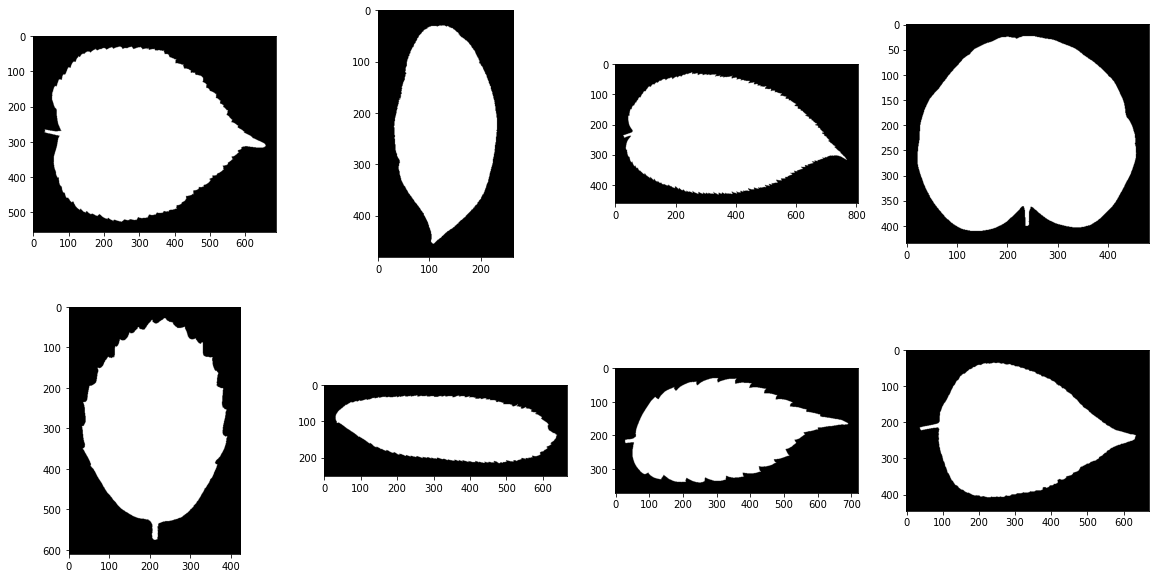

In [20]:
random_ids = [random.randint(0,(train.shape[0] + test.shape[0] + 1)) for i in range(8)]
images_paths = create_image_paths(random_ids)
draw_some_images(images_paths)
print('Drawing of some random images from the images folder every time')

In [ ]:
# change the data with each other to prevent the overfitting 
train = shuffle(train)

In [ ]:
# to assign y and x to values
X= train.drop(columns=['species','id'])
y = train[['species']]
test = test.drop(columns=['id'])

In [ ]:
train.shape

(990, 194)

In [ ]:
#shape of training data features
X.shape

(990, 192)

In [ ]:
##shape of training data label
y.shape

(990, 1)

In [ ]:
#encode the target column(species)
encoder = LabelEncoder()
y_fit = encoder.fit(train.species)
y = y_fit.transform(train.species) 
classes = list(y_fit.classes_) 
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [ ]:
#display target column after encoding
y

array([23, 38,  2, 80, 38, 71, 19, 31, 95, 97, 37, 18, 59, 36, 57, 27, 28,
       14, 63, 66, 83, 56, 55, 36,  0, 20, 48,  0, 18, 46, 97, 97, 45, 60,
       16, 91, 75, 16, 24, 93,  6, 23, 48, 25, 86, 96, 85, 84, 39, 45, 47,
       85, 13, 16, 88,  9, 41, 28, 70, 55, 79, 39, 48, 89, 46, 18, 81, 42,
        3, 10, 23, 79, 61, 17, 89, 31, 20, 29, 53, 92, 88, 32, 11, 98,  5,
       46, 59, 49, 98, 33, 66, 38, 44, 77, 79, 25, 87, 72, 16, 76, 31, 83,
       22, 26, 66, 45, 87, 26, 78, 57, 41,  4, 29, 26, 10, 54, 89, 34, 51,
       61, 60, 15, 54, 97,  5,  1, 82, 60, 40, 82, 83, 78, 81, 13, 24, 52,
        8, 82,  8, 55,  4, 57,  6, 69, 78, 78, 82, 36, 60, 68, 50, 69, 31,
       76, 11, 55, 35, 70, 29, 76, 15, 11, 46, 90, 29, 20, 34, 12,  9,  8,
       20, 30, 34, 10, 45, 26, 95,  7, 54, 17,  5, 35, 29, 88, 72, 94,  7,
       11,  4, 15, 19, 58, 65, 89, 80, 48,  8, 88, 84, 82, 90, 91, 25, 77,
       34, 42, 50, 80, 77, 77, 57, 52, 75, 25, 31, 44, 40, 11, 55, 71, 25,
       78, 28,  3, 58, 14

In [ ]:
#number of unique values in label column
train['species'].nunique()

99

Split to train & validation data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 40)

Scaling


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_Data=scaler.transform(test)

In [ ]:
from keras import regularizers
from keras.callbacks import EarlyStopping

def training(optemizer):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))

  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  model.compile(optemizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100)

  return model,history

In [ ]:
#evaluation function
def evaluate(model,x,y):
  loss,acc=model.evaluate(x,y)
  print("\n loss= ",loss)
  print("\n Accuracy= ",acc)

# optimizer

Trial_1 (Adam)

In [ ]:
model,history= training("adam")
model

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 3.1427 - accuracy: 0.3396 - val_loss: 1.7225 - val_accuracy: 0.7323
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.8786 - accuracy: 0.9318 - val_loss: 0.6605 - val_accuracy: 0.9394
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3315 - accuracy: 0.9785 - val_loss: 0.3854 - val_accuracy: 0.9646
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1662 - accuracy: 0.9975 - val_loss: 0.2767 - val_accuracy: 0.9848
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1098 - accuracy: 0.9975 - val_loss: 0.2264 - val_accuracy: 0.9848
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9975 - val_loss: 0.1947 - val_accuracy: 0.9747
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 0.1672 - val_accuracy: 0.9848
Epoch 8/100


In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 5.4095e-04 - accuracy: 1.0000

 loss=  0.0005409498116932809

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9899

 loss=  0.040136322379112244

 Accuracy=  0.9898989796638489


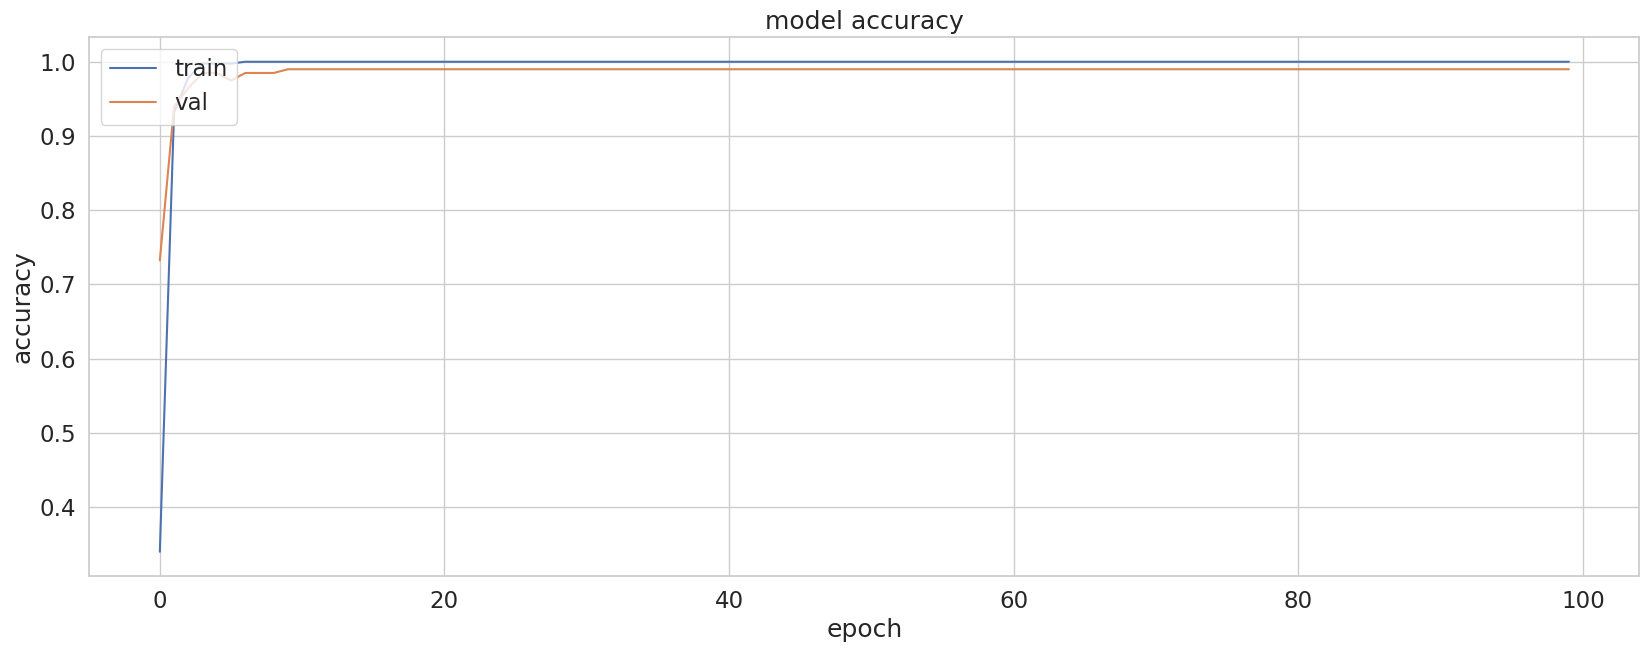

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

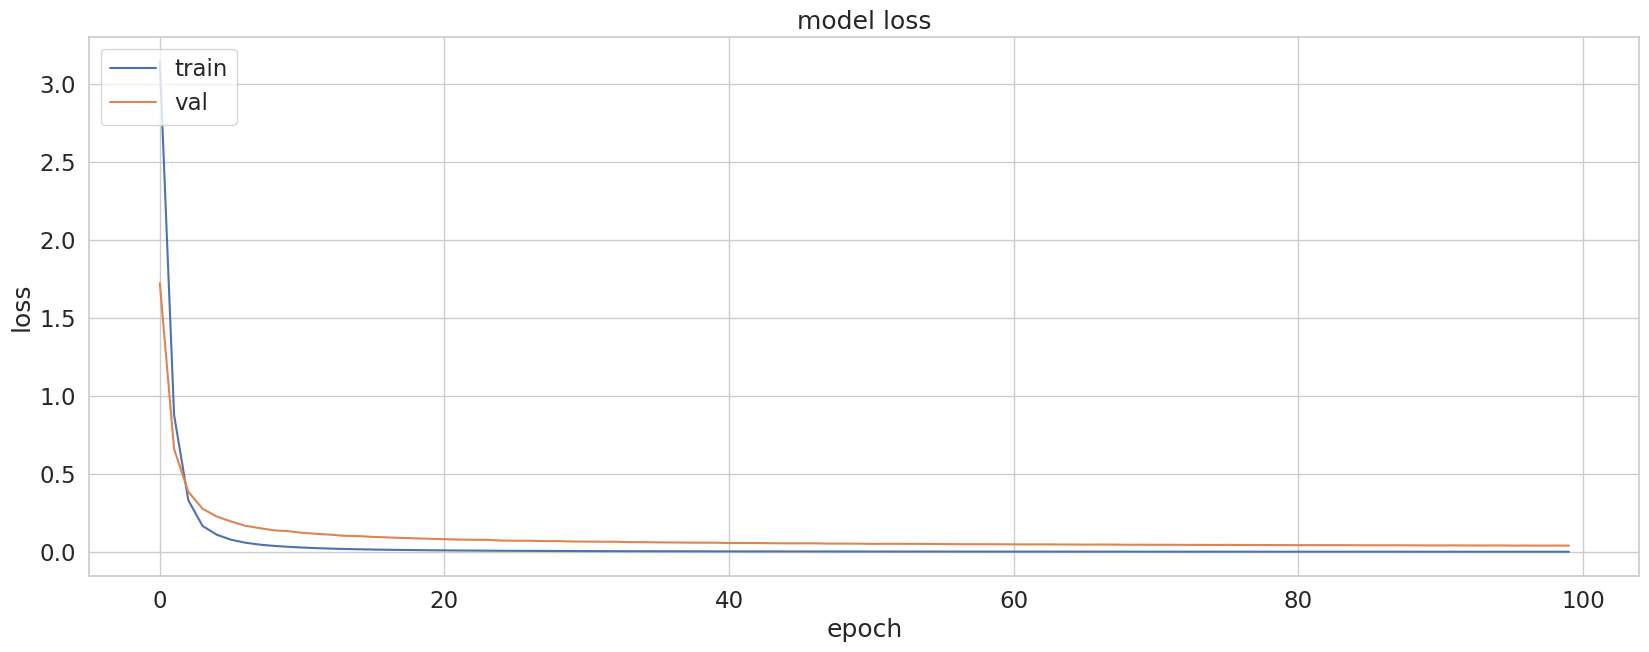

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_2 (SGD)

In [ ]:
model,history= training("SGD")

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 4.5372 - accuracy: 0.0290 - val_loss: 4.3401 - val_accuracy: 0.0455
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 3.9914 - accuracy: 0.1250 - val_loss: 3.9032 - val_accuracy: 0.1414
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 3.5118 - accuracy: 0.2727 - val_loss: 3.5175 - val_accuracy: 0.2576
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 3.0952 - accuracy: 0.4306 - val_loss: 3.1778 - val_accuracy: 0.4091
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 2.7336 - accuracy: 0.5884 - val_loss: 2.8759 - val_accuracy: 0.4596
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 2.4186 - accuracy: 0.7109 - val_loss: 2.6100 - val_accuracy: 0.5657
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 2.1472 - accuracy: 0.7929 - val_loss: 2.3735 - val_accuracy: 0.6364
Epoch 8/100


In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 1.0000

 loss=  0.08006001263856888

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9899

 loss=  0.21192747354507446

 Accuracy=  0.9898989796638489


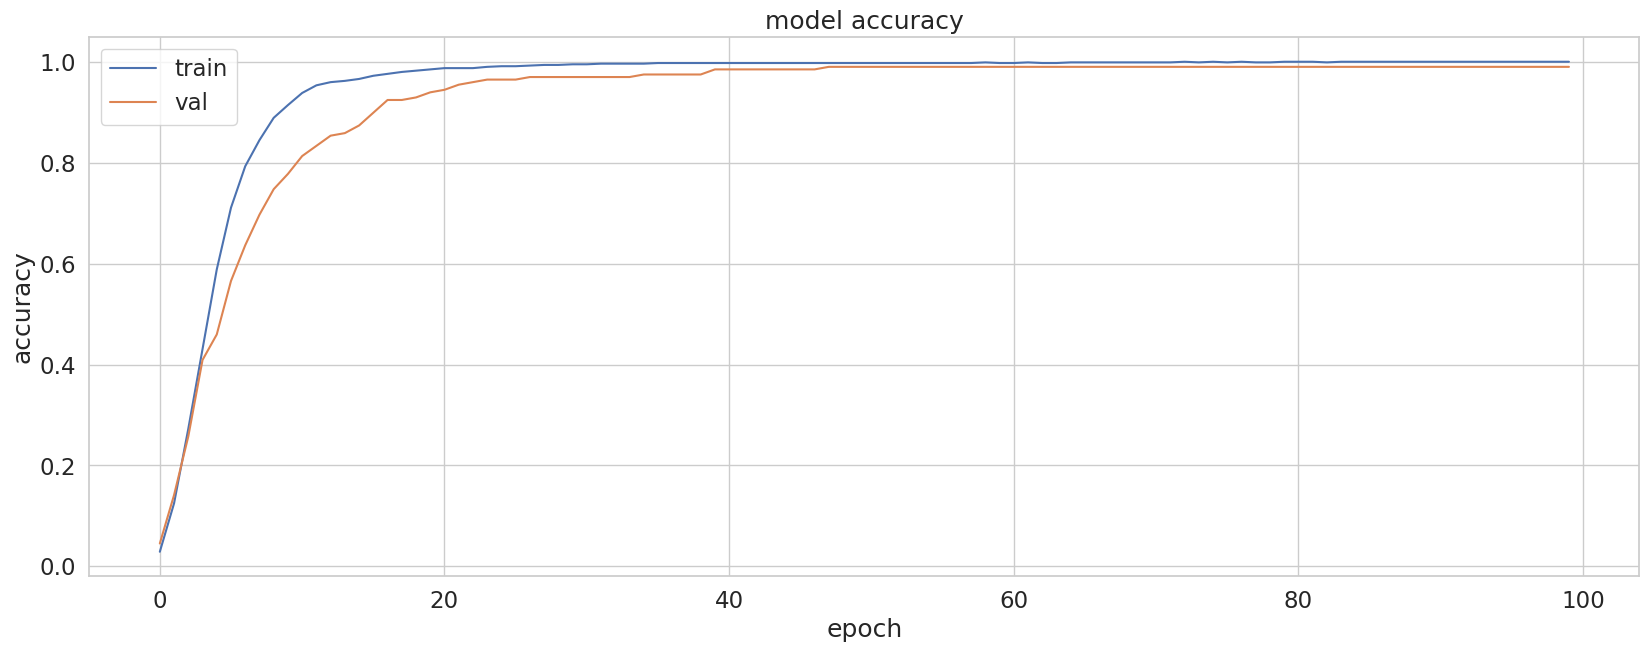

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

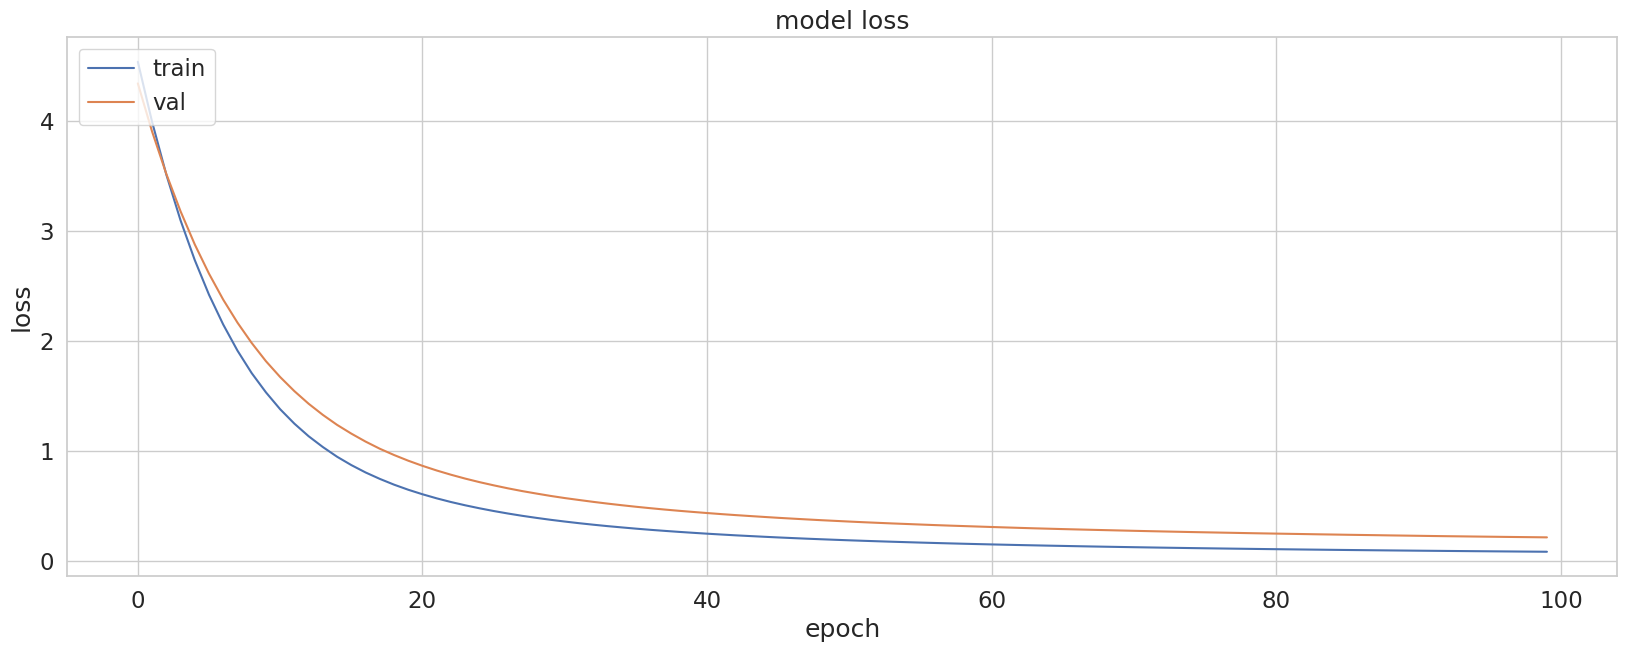

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_3 (RMSProp)

In [ ]:
model,history= training("RMSProp")

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 2.6495 - accuracy: 0.5177 - val_loss: 1.2957 - val_accuracy: 0.8485
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7604 - accuracy: 0.9407 - val_loss: 0.5504 - val_accuracy: 0.9394
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2891 - accuracy: 0.9861 - val_loss: 0.3228 - val_accuracy: 0.9545
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1363 - accuracy: 0.9937 - val_loss: 0.2106 - val_accuracy: 0.9646
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0682 - accuracy: 0.9987 - val_loss: 0.1623 - val_accuracy: 0.9697
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 0.9975 - val_loss: 0.1193 - val_accuracy: 0.9798
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9798
Epoch 8/100


In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 1.7426e-04 - accuracy: 1.0000

 loss=  0.00017425981059204787

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9899

 loss=  0.041572559624910355

 Accuracy=  0.9898989796638489


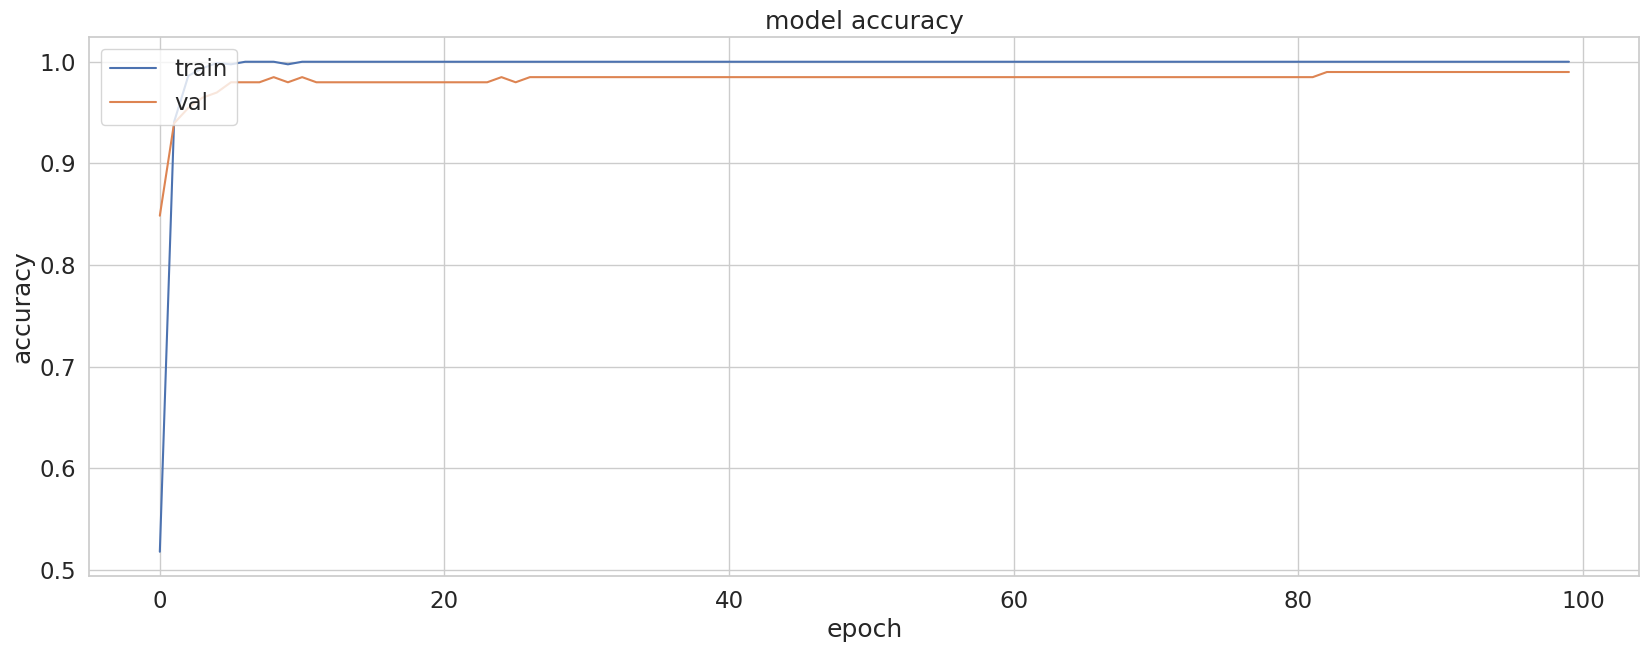

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

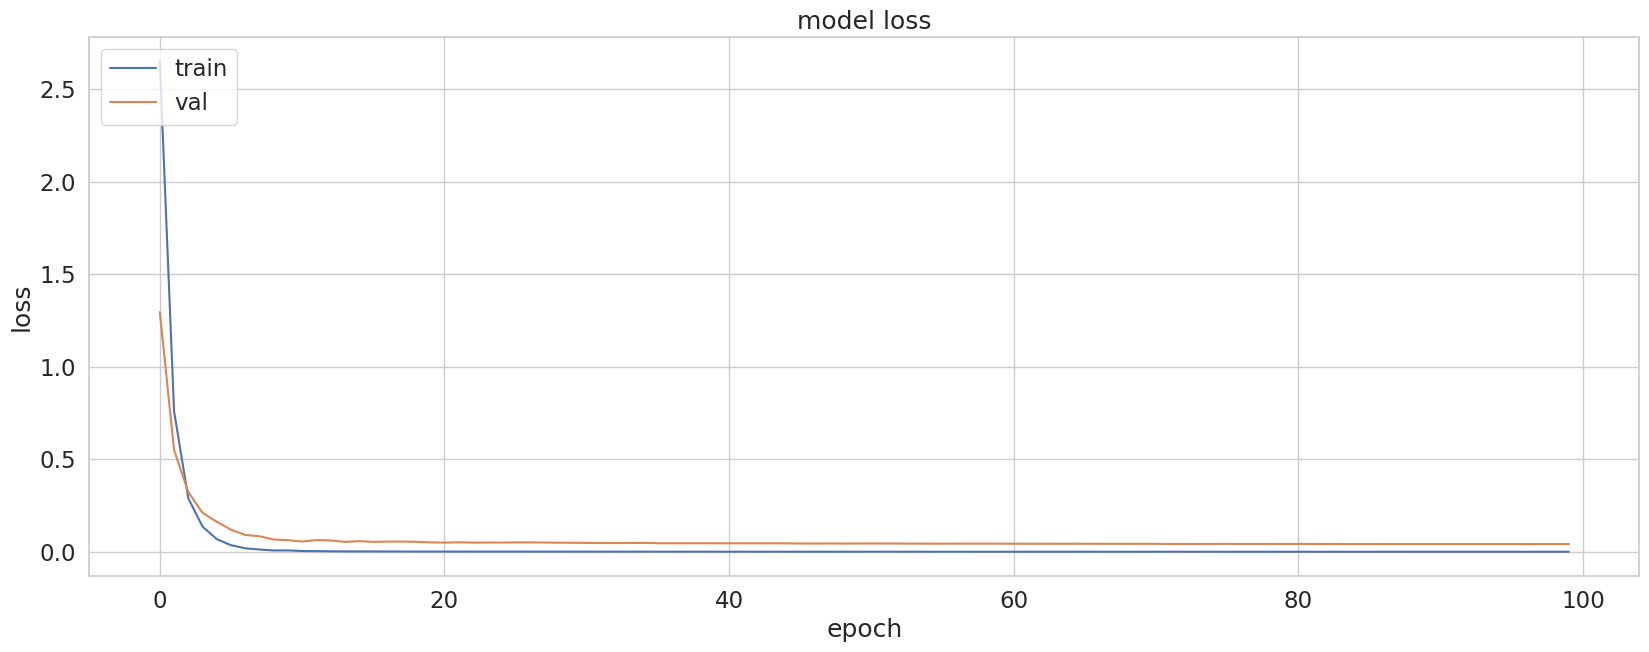

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


From the previous trials, we discovered that Adam optimizer is the best optimizer

# Learning rate

In [ ]:
def training(lr):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(lr)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 80,verbose=0)

  return model,history

Trial_1 (0.1)

In [ ]:
model,history= training(.1)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.7589 - accuracy: 0.9823

 loss=  0.758880615234375

 Accuracy=  0.9823232293128967


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 7.3201 - accuracy: 0.8434

 loss=  7.320125579833984

 Accuracy=  0.8434343338012695


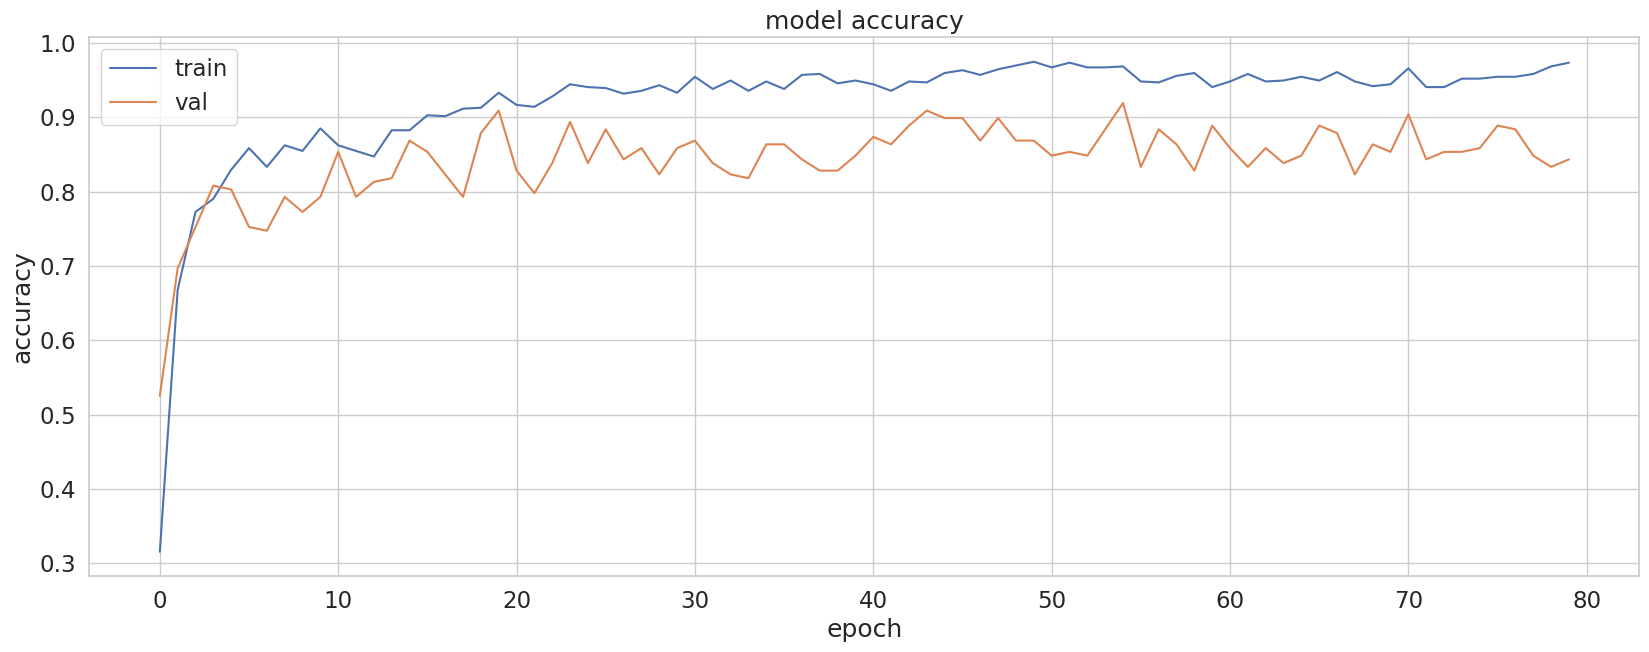

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

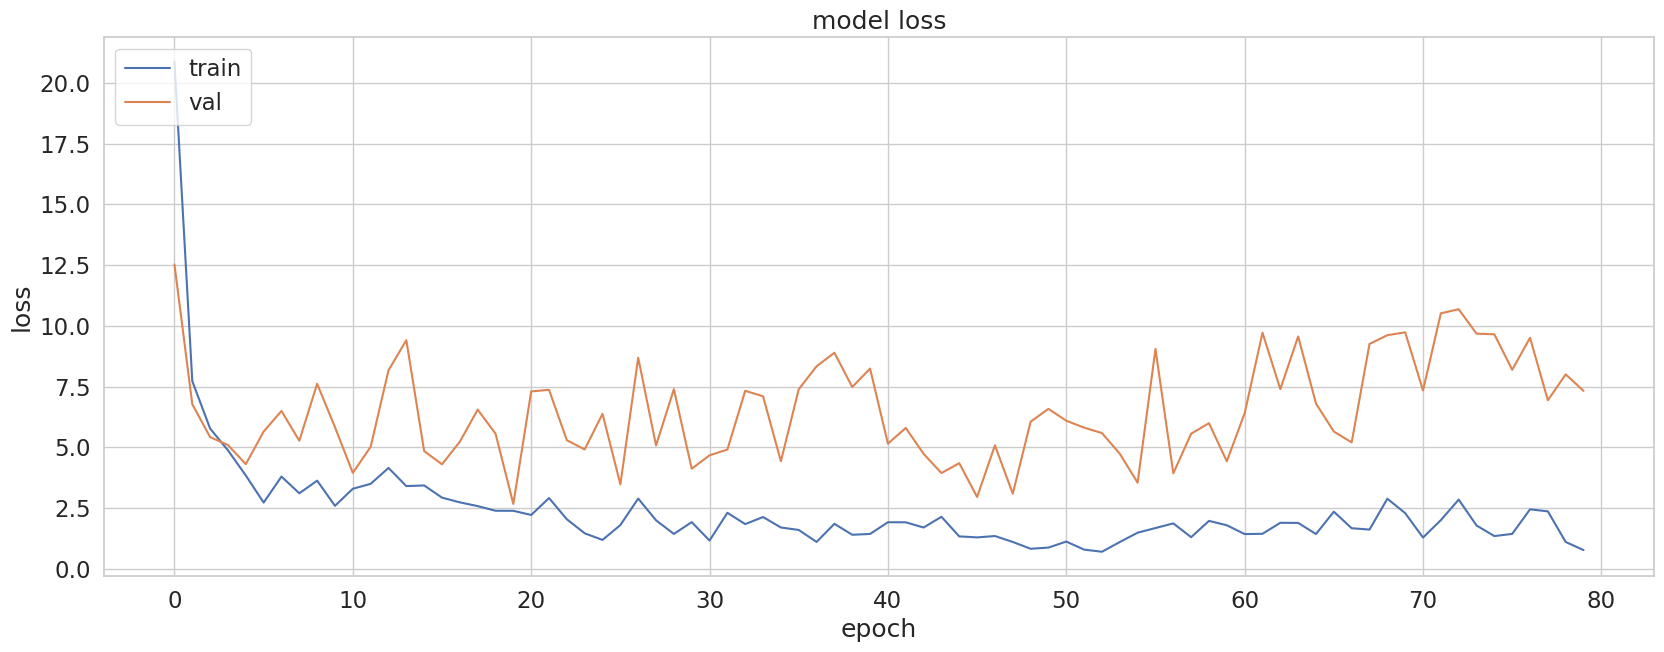

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_2(0.01)

In [ ]:
model,history= training(0.01)

In [ ]:

evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 0.9747

 loss=  0.1322224736213684

 Accuracy=  0.9747474789619446


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.9192

 loss=  0.5970020294189453

 Accuracy=  0.9191918969154358


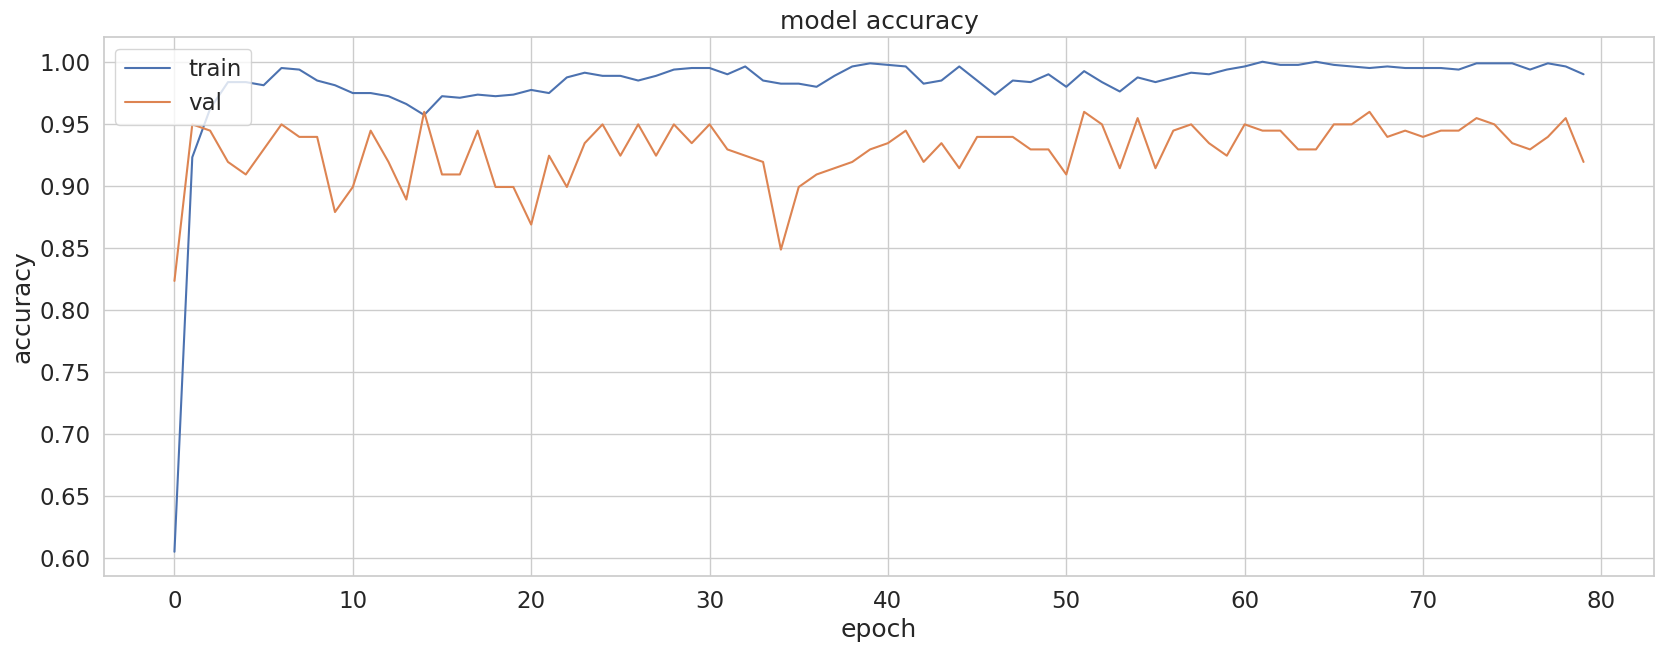

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


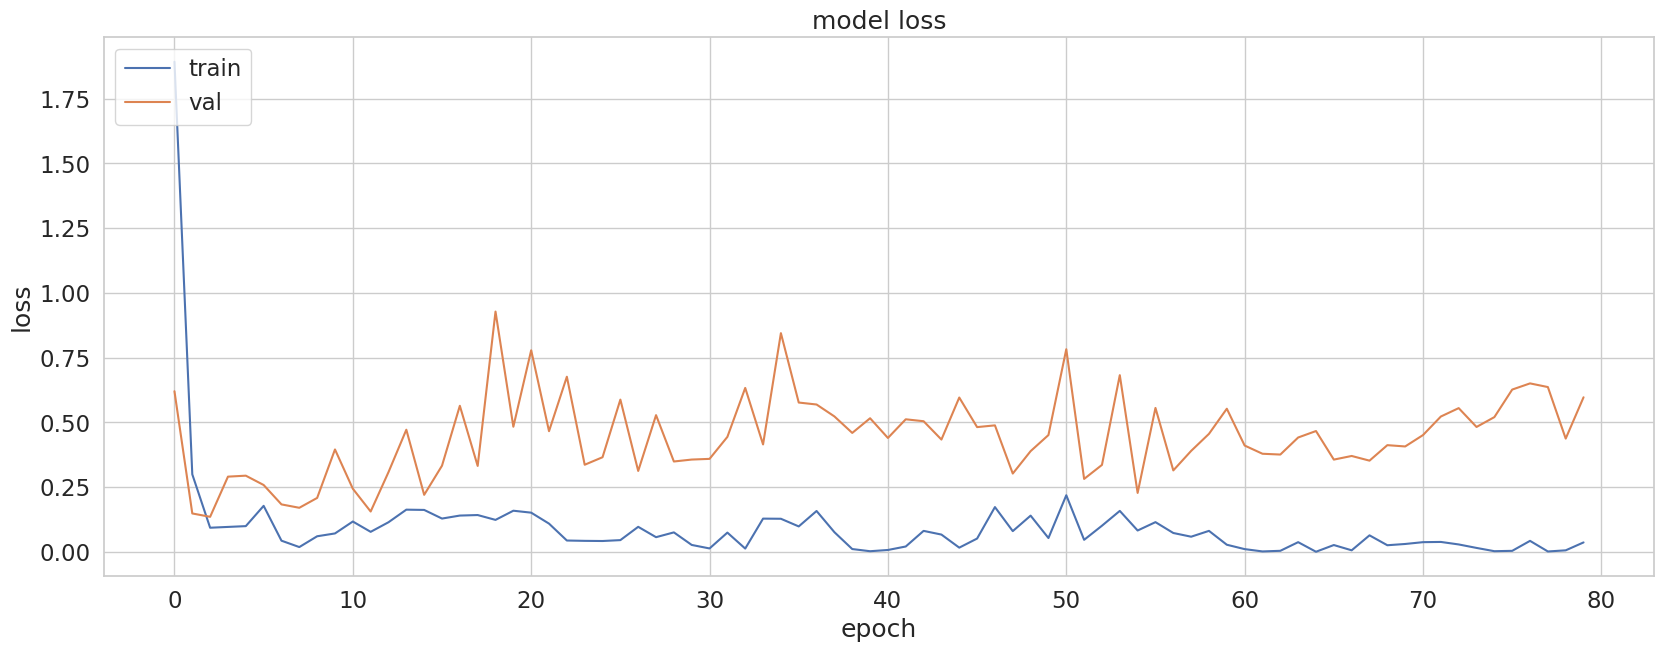

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_3(0.001)

In [ ]:
model,history= training(0.001)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 8.3097e-04 - accuracy: 1.0000

 loss=  0.0008309704135172069

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9848

 loss=  0.04948651045560837

 Accuracy=  0.9848484992980957


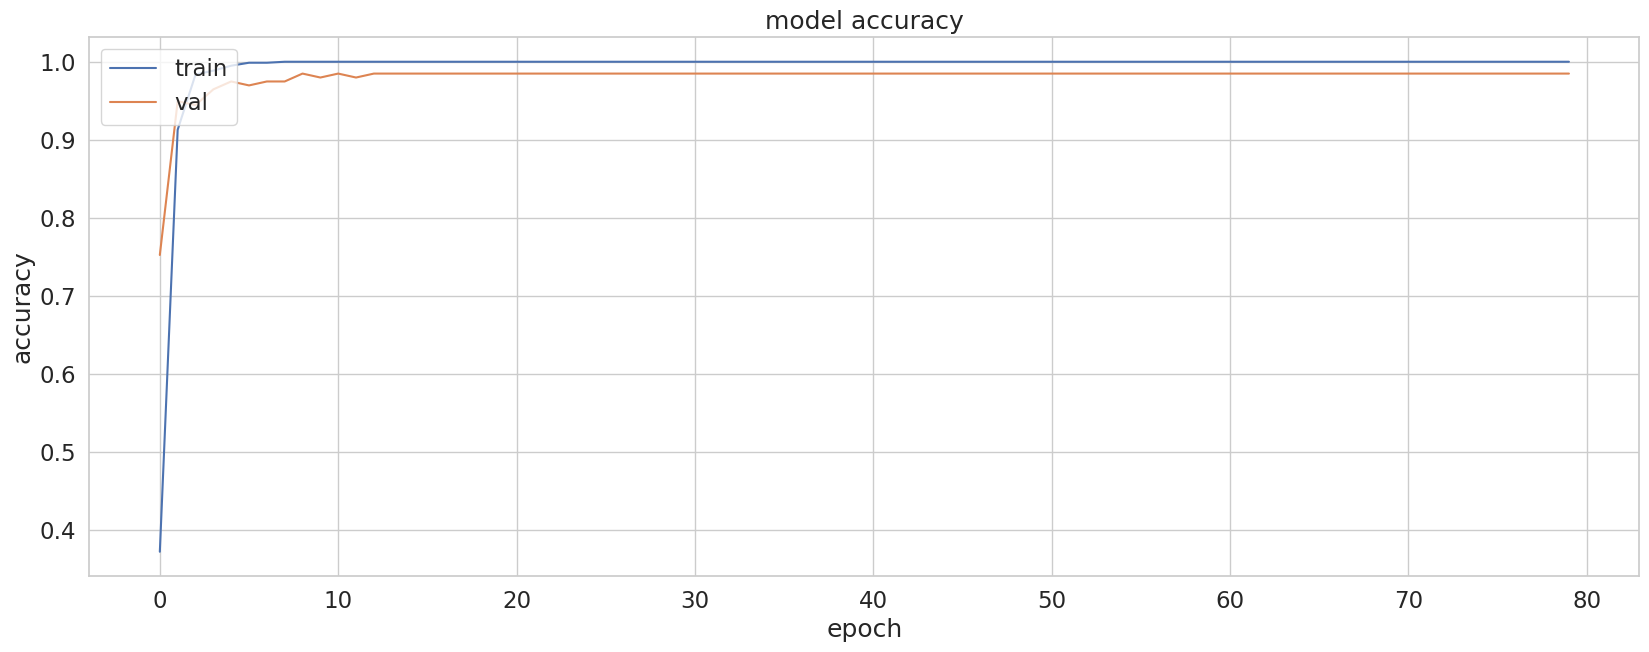

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


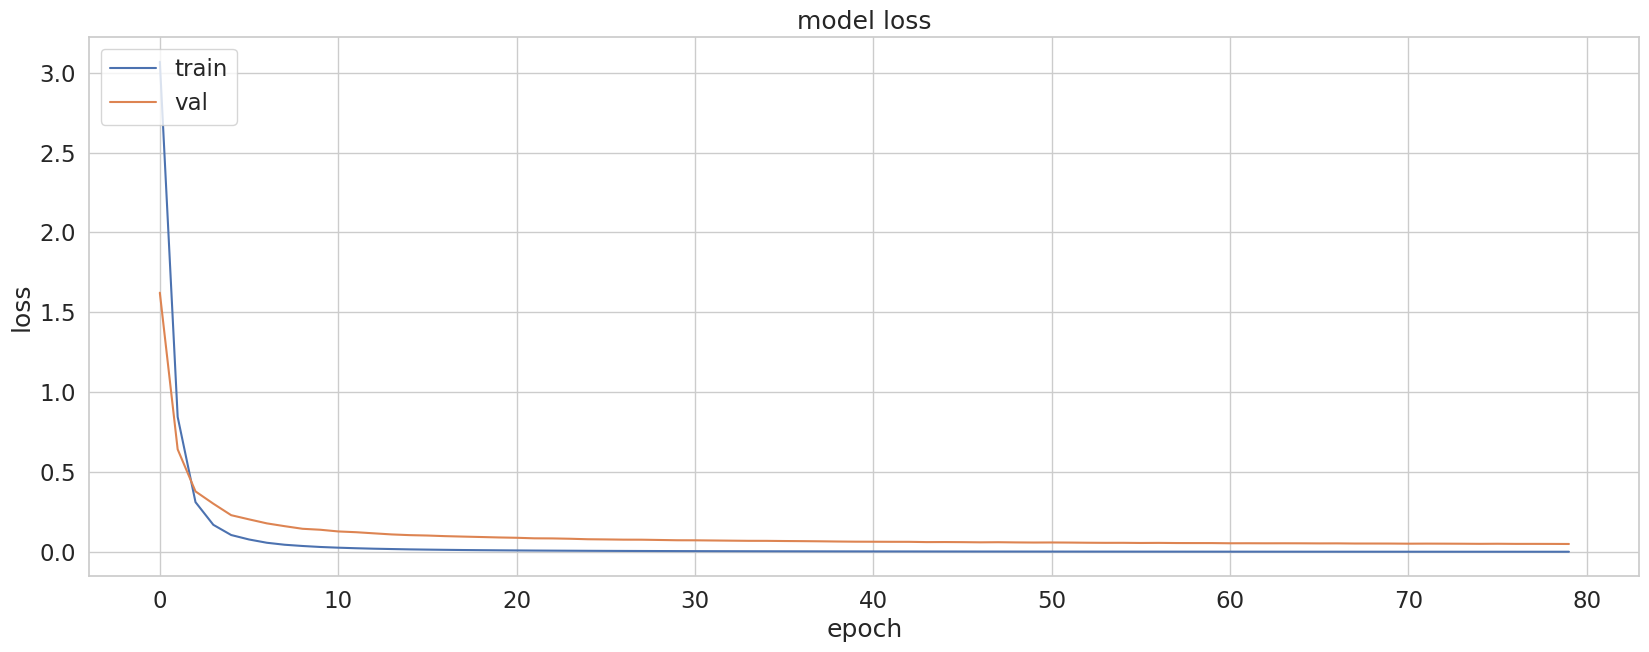

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 From the previous trials, we discover that the best learning rate =0.001

# Batch_size

In [ ]:
def training(batch):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(0.001)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = batch, epochs = 100,verbose=0)

  return model,history

Trial_1 (16)

In [ ]:
model,history= training(16)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 1.6468e-04 - accuracy: 1.0000

 loss=  0.00016467523528262973

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9949

 loss=  0.03483410179615021

 Accuracy=  0.9949495196342468


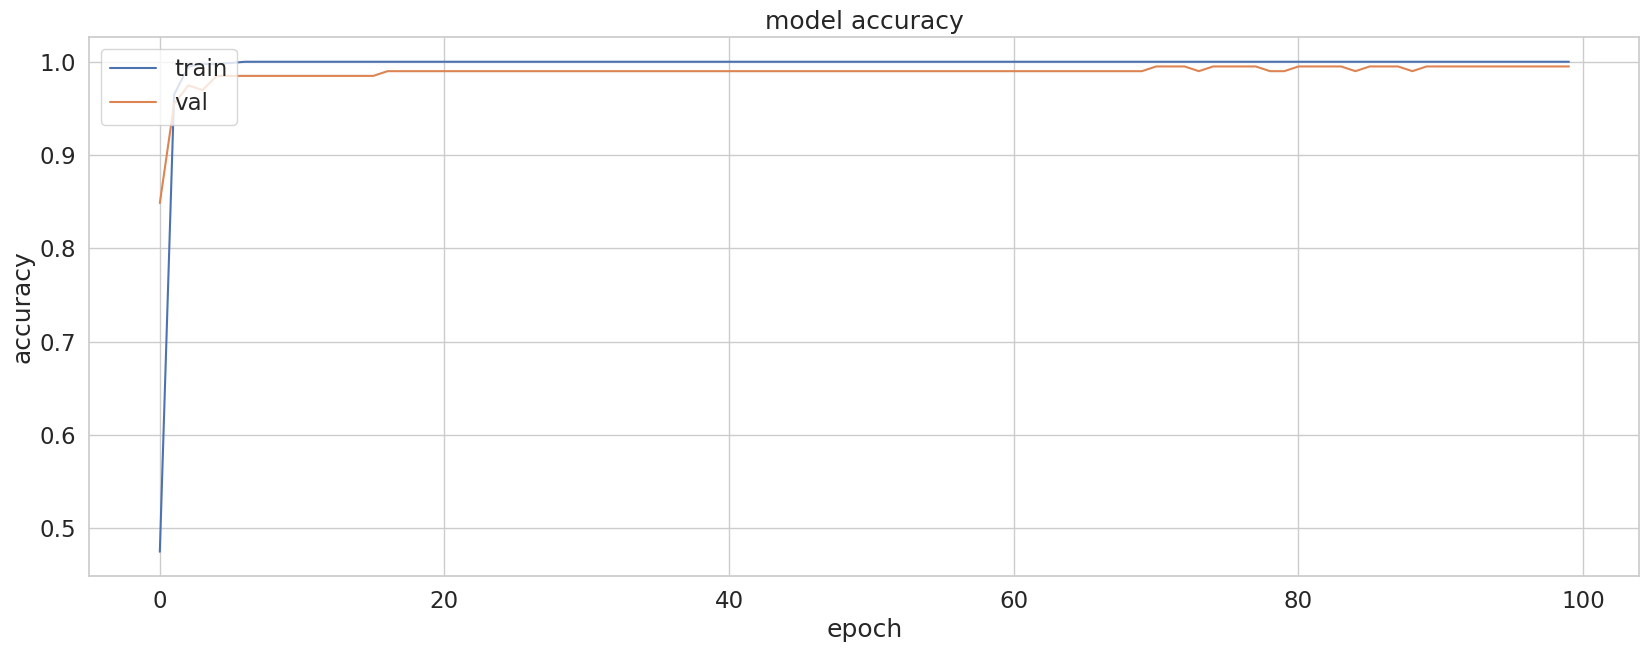

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

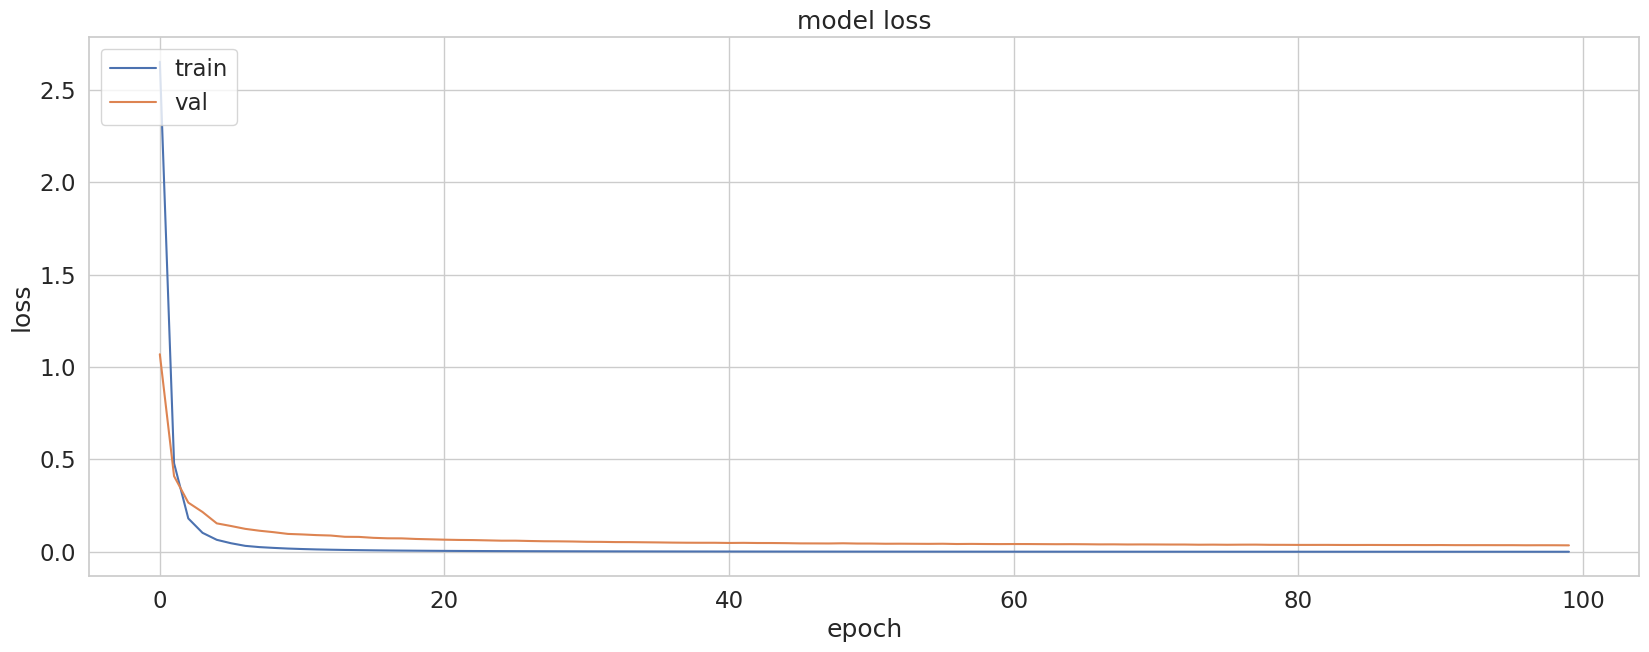

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Trial_2(32)

In [ ]:
model,history= training(32)

In [ ]:

evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 5.2193e-04 - accuracy: 1.0000

 loss=  0.0005219274898990989

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9899

 loss=  0.039709605276584625

 Accuracy=  0.9898989796638489


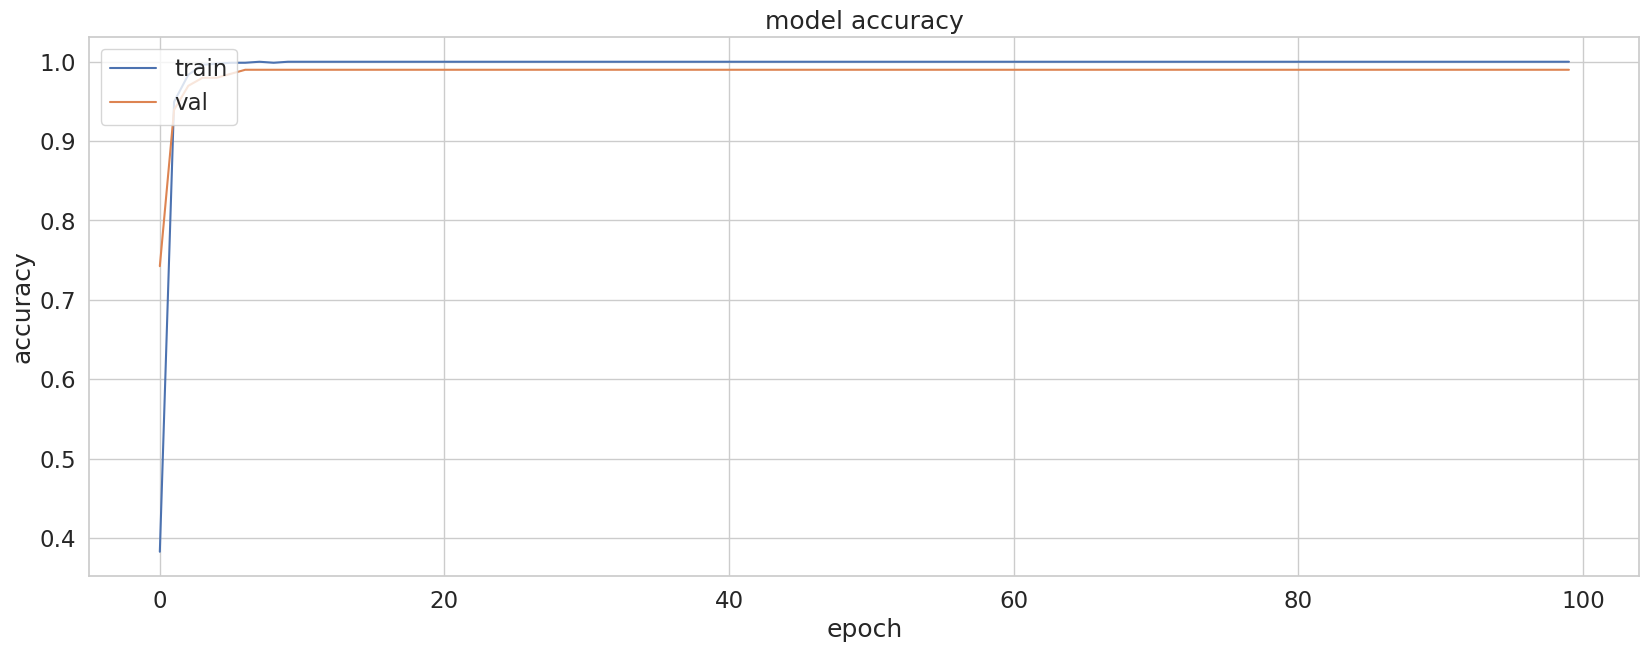

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

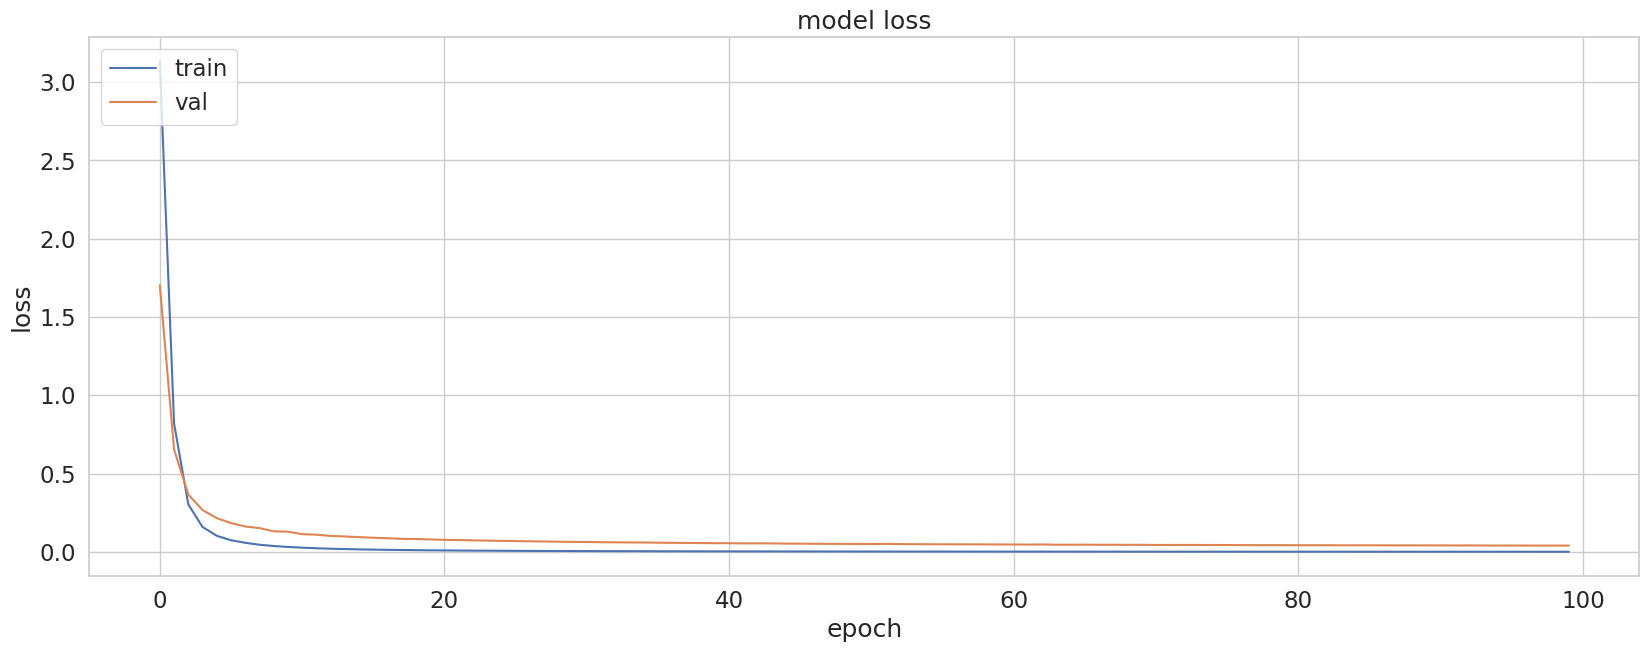

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_3(64)

In [ ]:
model,history= training(64)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000

 loss=  0.0012231662403792143

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9899

 loss=  0.046776868402957916

 Accuracy=  0.9898989796638489


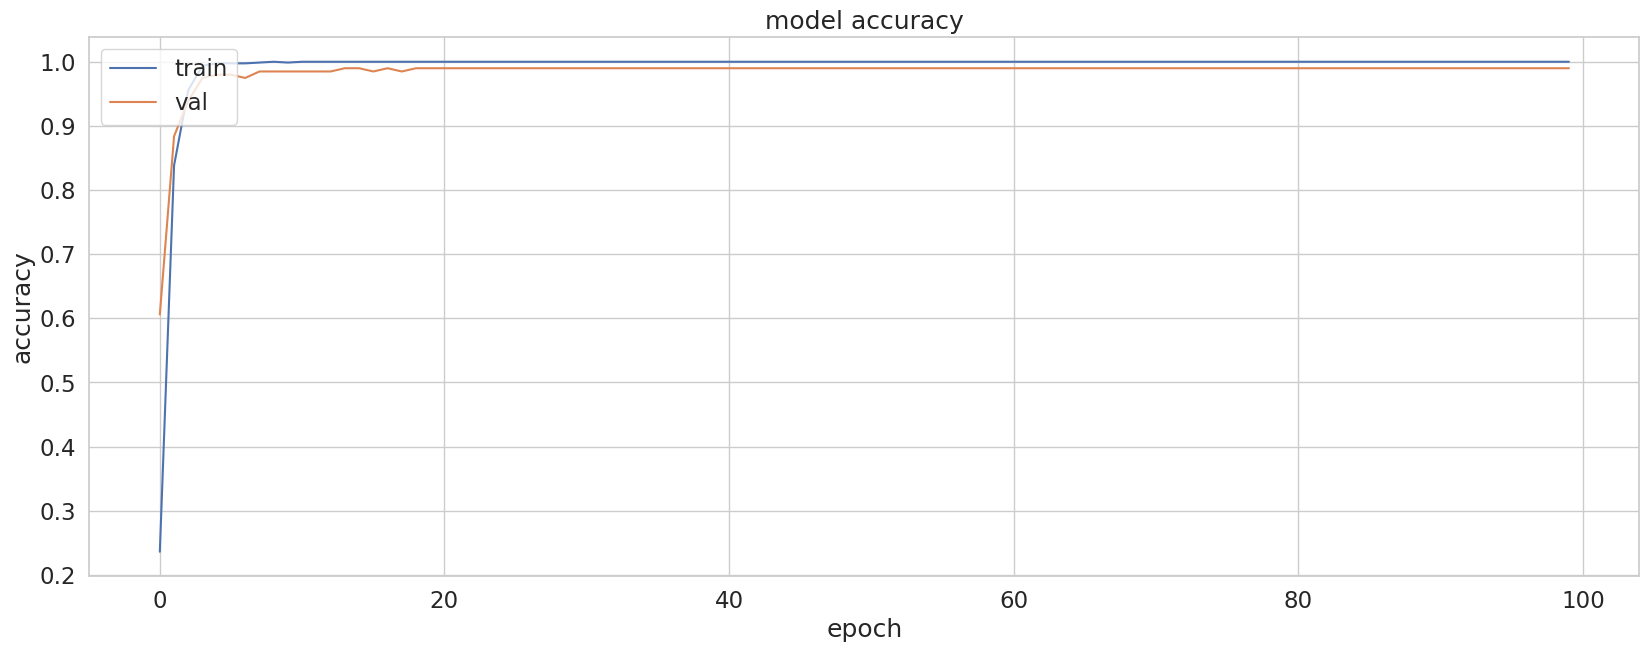

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

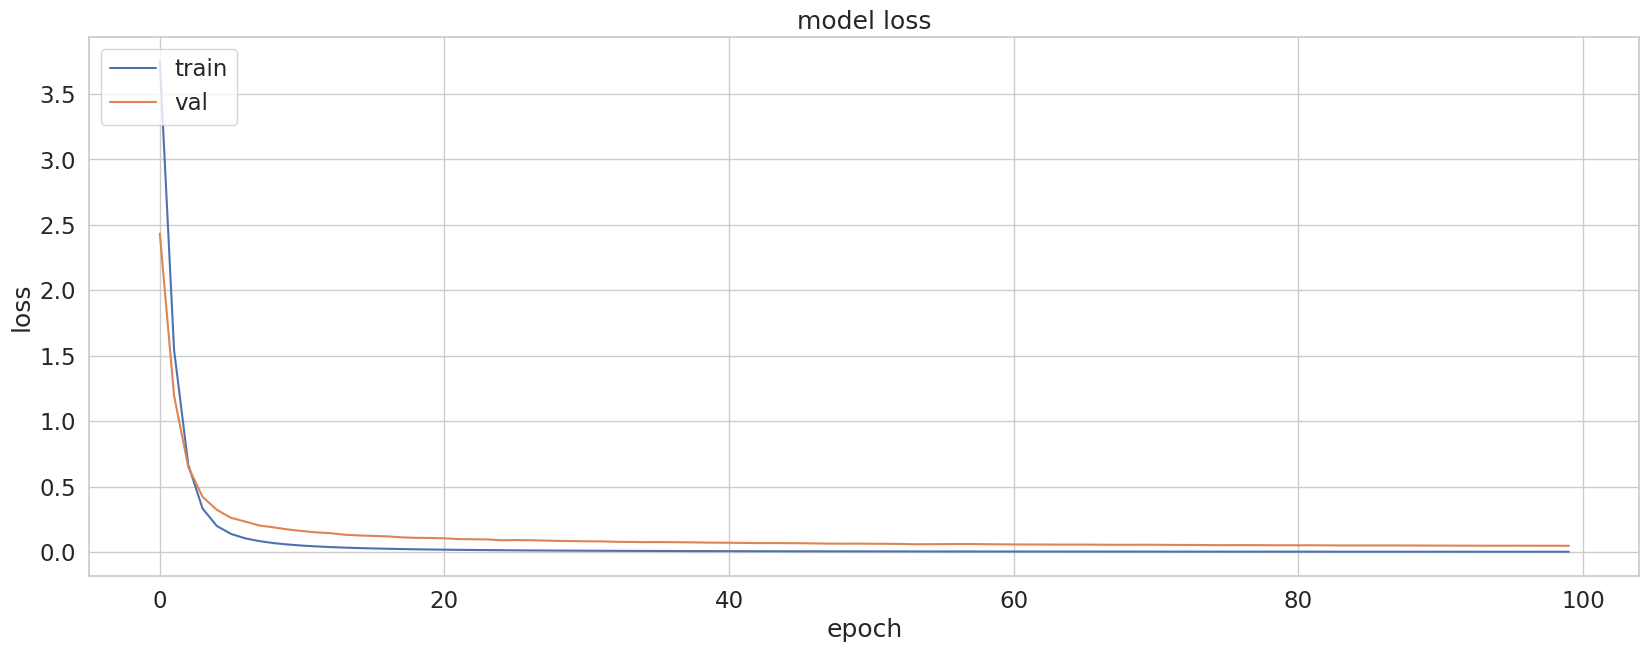

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

From the previous trials, we discovered that the best batch_size=32

In [ ]:
def training(unit):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = unit, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(0.001)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100,verbose=0)

  return model,history

Trial_1 (256)

In [ ]:
model,history= training(256)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000

 loss=  0.0011722316266968846

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9798

 loss=  0.06278765946626663

 Accuracy=  0.9797979593276978


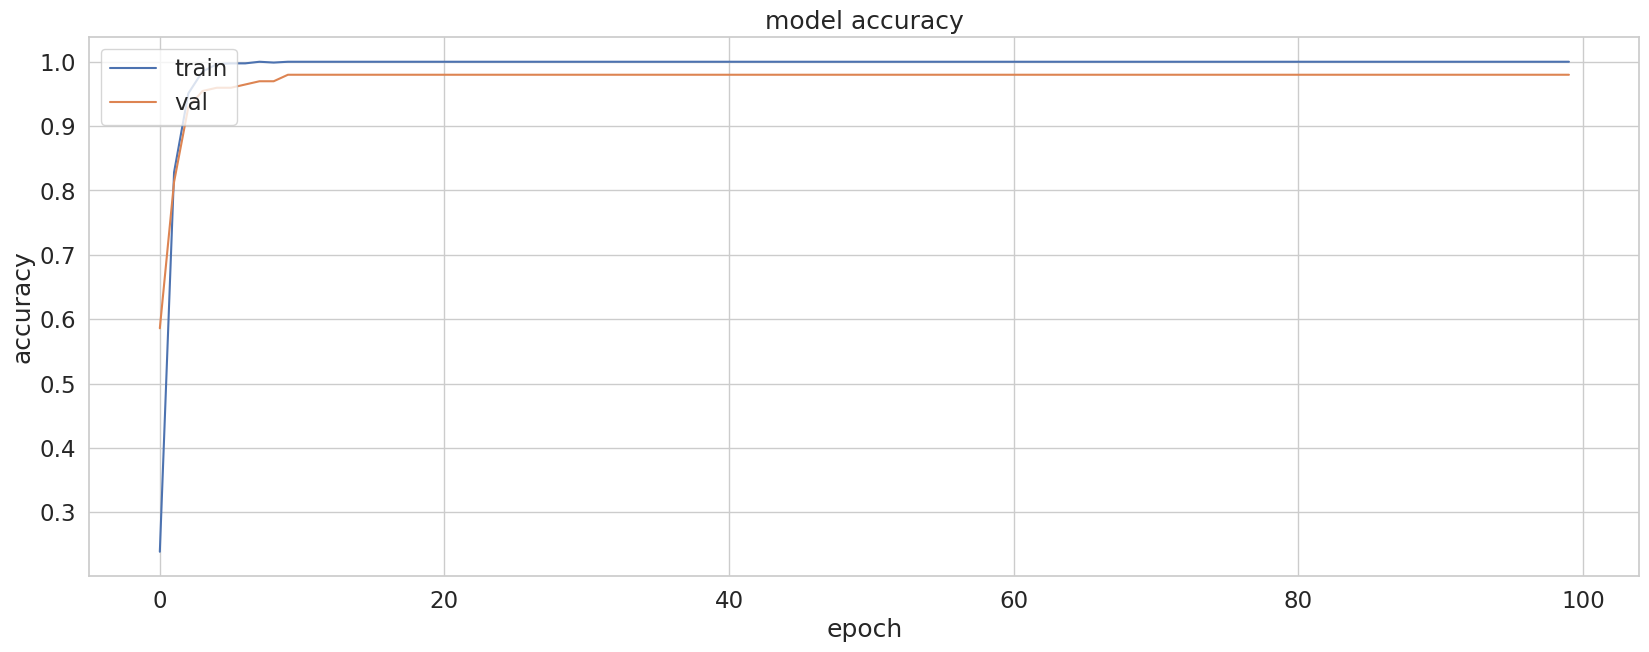

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

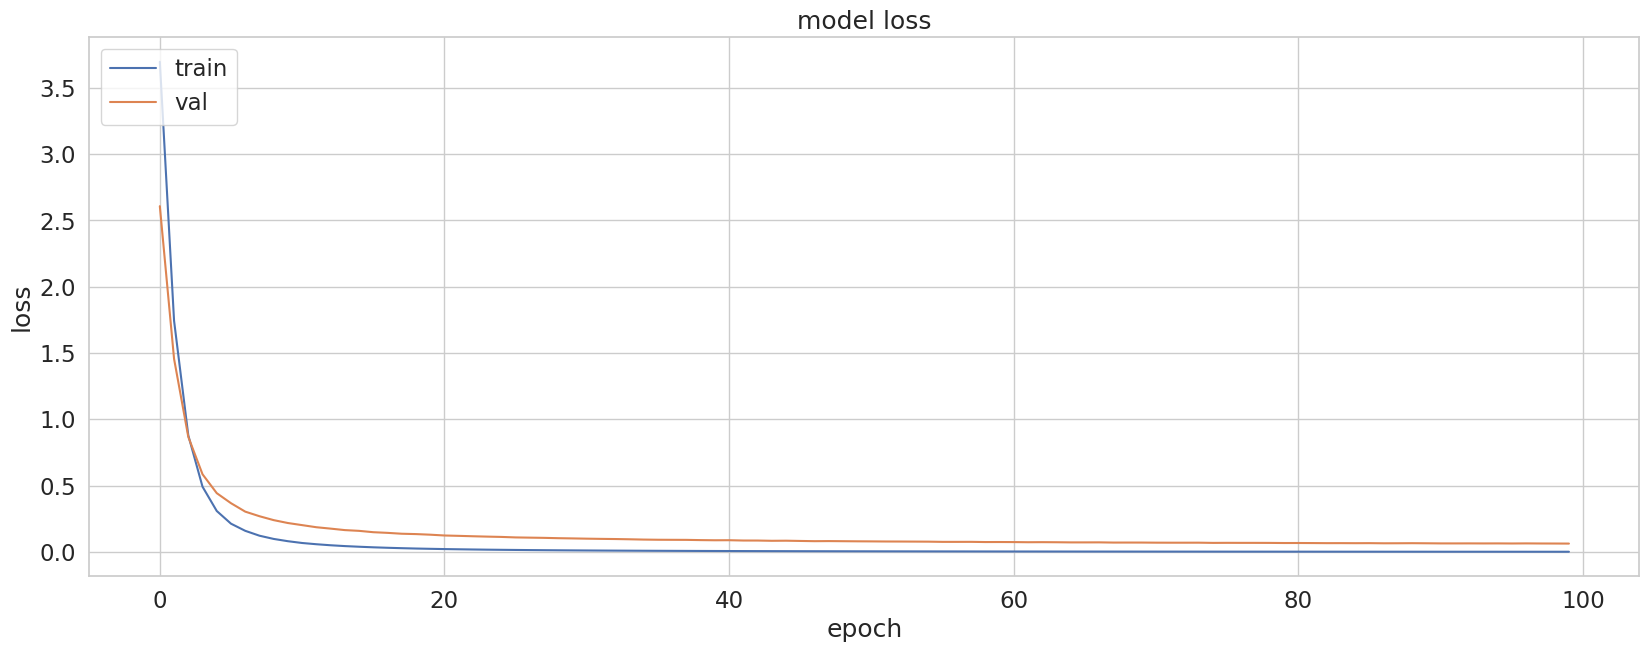

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Trial_2(512)

In [ ]:
model,history= training(512)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 5.3019e-04 - accuracy: 1.0000

 loss=  0.0005301863420754671

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9949

 loss=  0.03889188542962074

 Accuracy=  0.9949495196342468


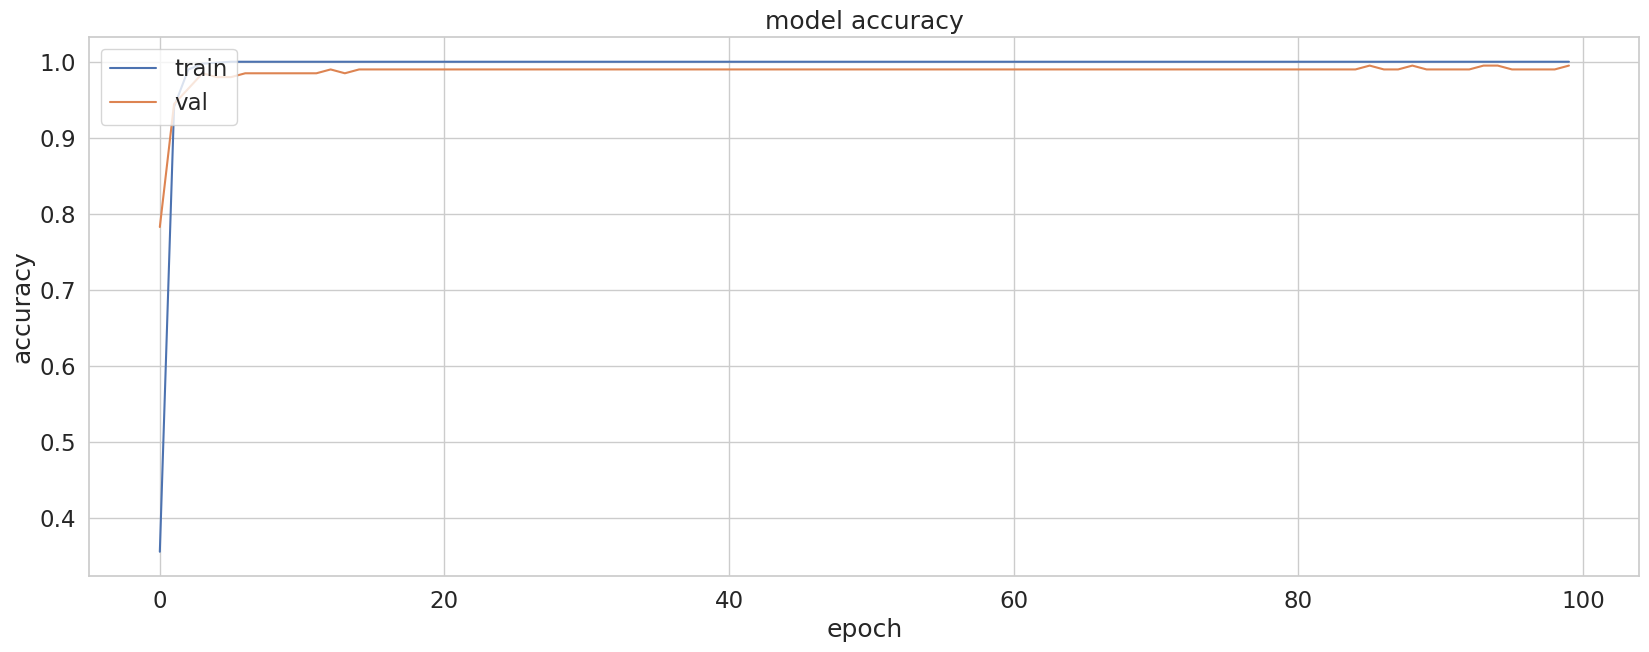

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


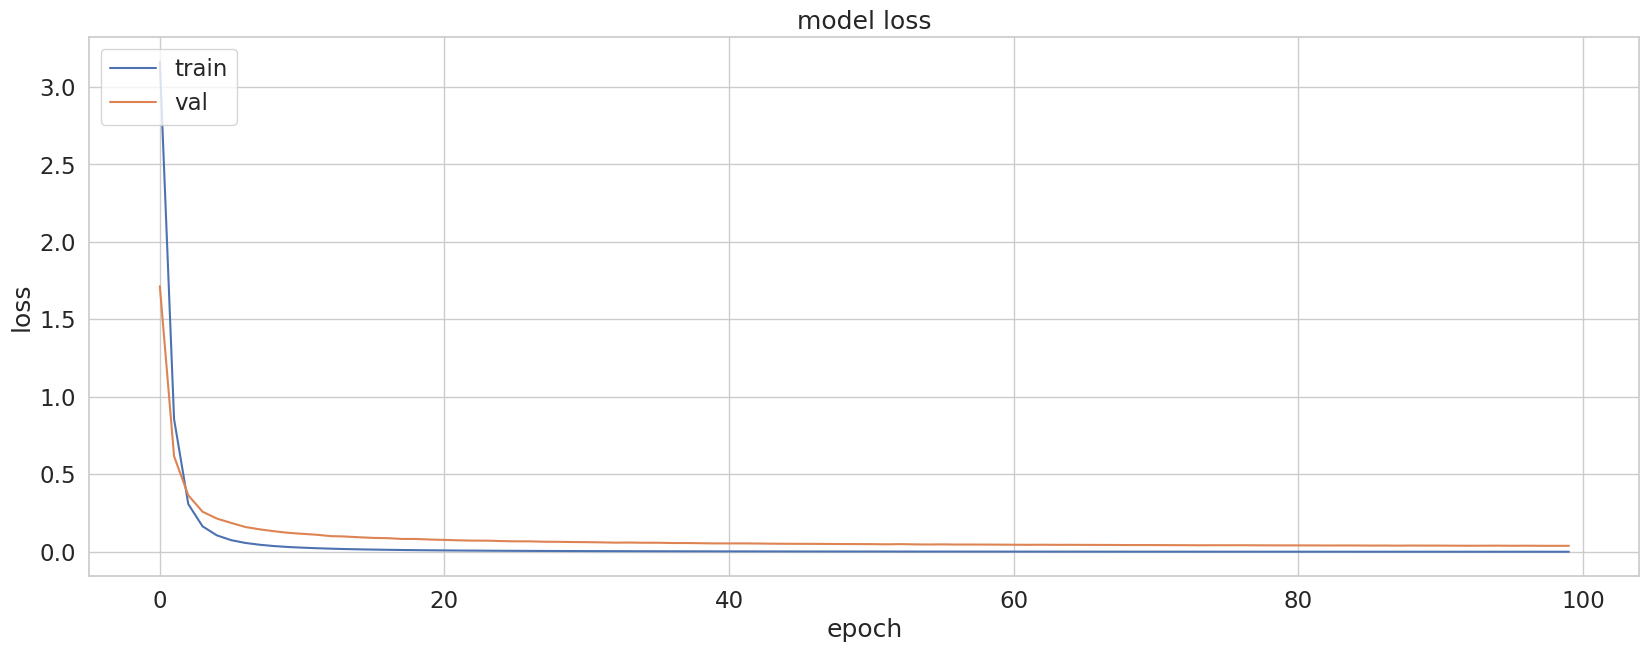

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Trial_3(128)

In [ ]:
model,history= training(128)

In [ ]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000

 loss=  0.0029884143732488155

 Accuracy=  1.0


In [ ]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 1.0000

 loss=  0.060084082186222076

 Accuracy=  1.0


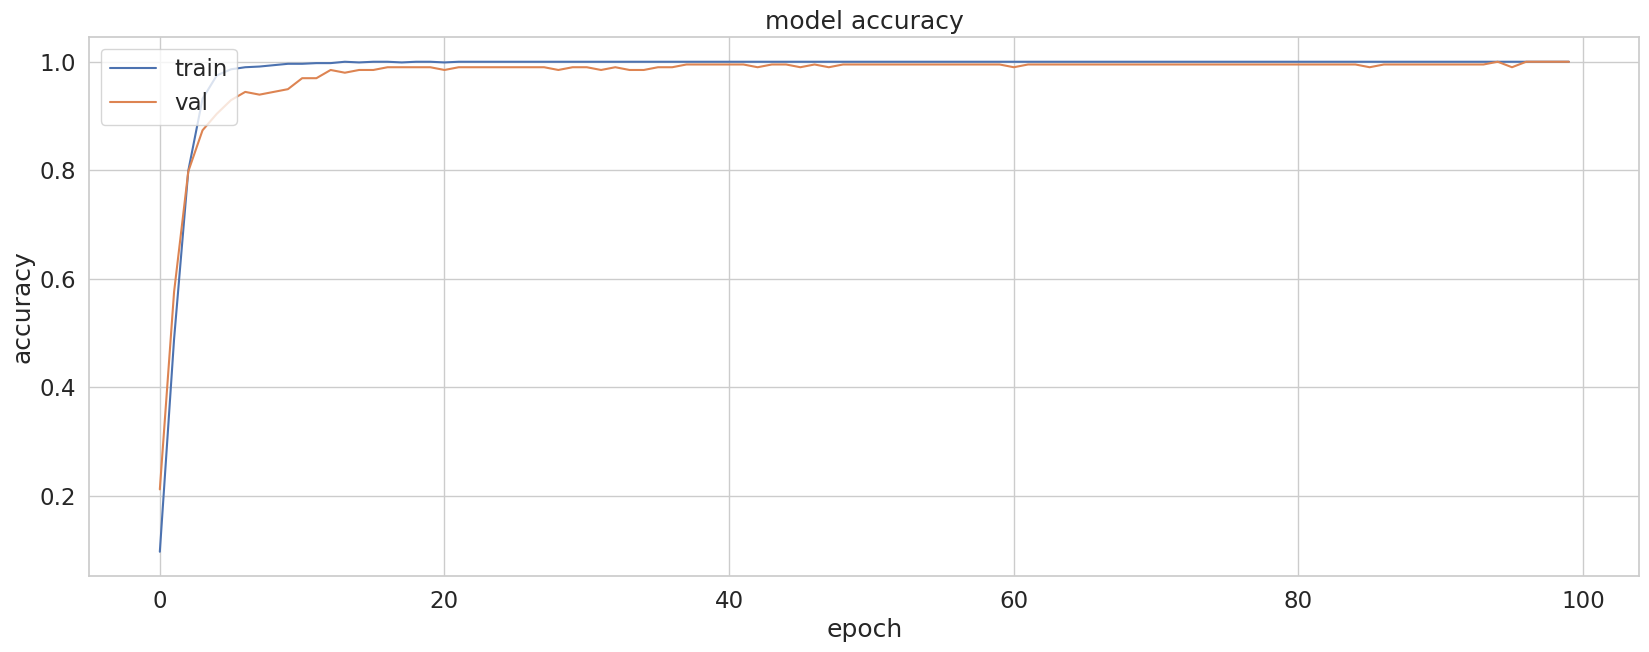

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

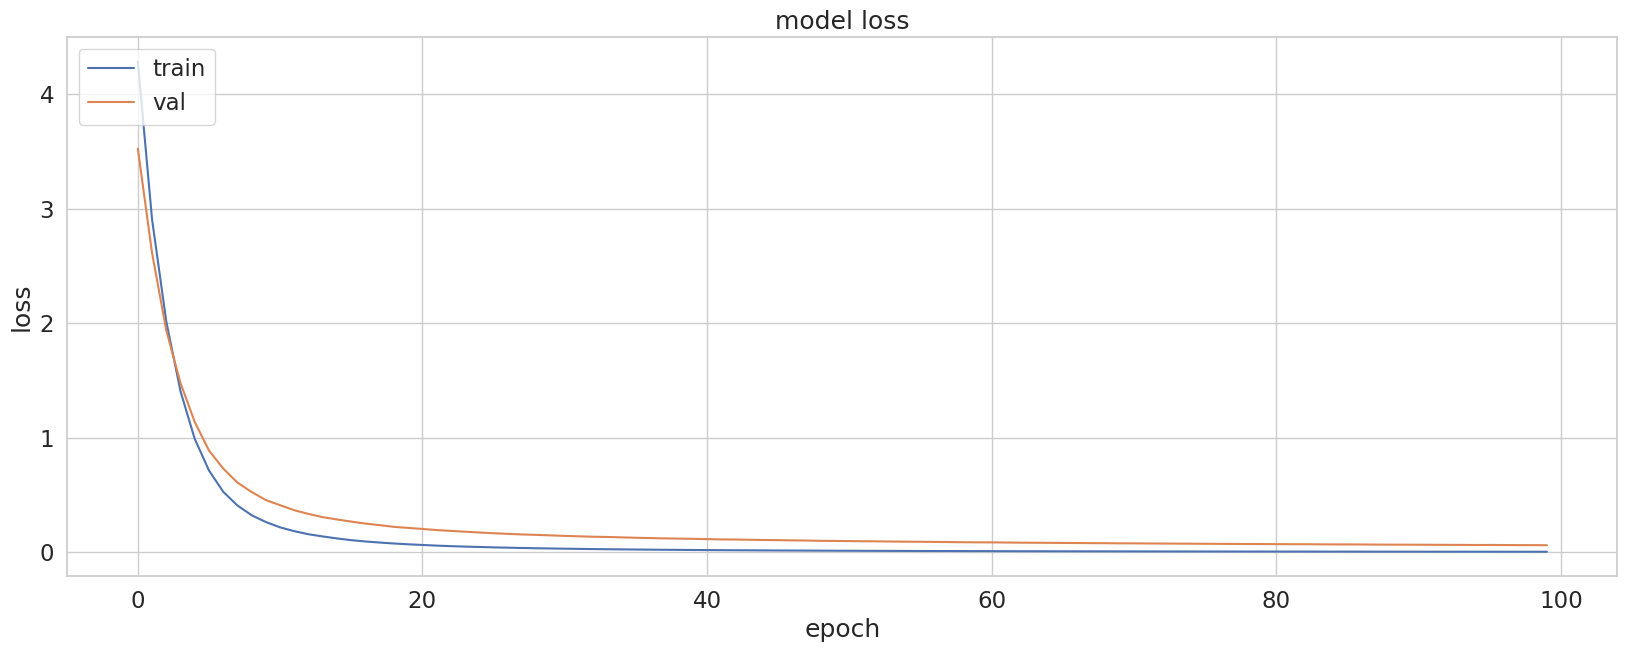

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


From the previous trials, we discovered that best hidden units=128